In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize


In [2]:
target = []
images = []
flat_data = []

In [3]:
DATADIR = 'face'
CATEGORIES = ['real','fake']

for category in CATEGORIES:
    class_num = CATEGORIES.index(category) 
    path = os.path.join(DATADIR,category) # Create path to use all the images
    
    for img in os.listdir(path):
        img_array = imread(os.path.join(path,img))
        
        # To resize image
        img_resized = resize(img_array,(150,150,2)) # Normalizes the value from 0 to 1
        flat_data.append(img_resized.flatten())
        images.append(img_resized)
        target.append(class_num)
        
flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)
       

In [4]:
print(flat_data)

[[0.71985294 0.39705882 0.75318627 ... 0.10098039 0.08333333 0.10759804]
 [1.         1.         1.         ... 0.63676471 0.82205882 0.63529412]
 [0.13553922 0.13627451 0.11985294 ... 0.45857843 0.38627451 0.4245098 ]
 ...
 [0.83529412 0.85588235 0.83921569 ... 0.84730392 0.8127451  0.83333333]
 [0.04166667 0.07401961 0.05392157 ... 0.37230392 0.47058824 0.37647059]
 [0.94901961 0.97254902 0.94901961 ... 0.21960784 0.75612745 0.27892157]]


In [5]:
flat_data[0]

array([0.71985294, 0.39705882, 0.75318627, ..., 0.10098039, 0.08333333,
       0.10759804])

In [6]:
len(flat_data)

2041

In [7]:
target

array([0, 0, 0, ..., 1, 1, 1])

<BarContainer object of 2 artists>

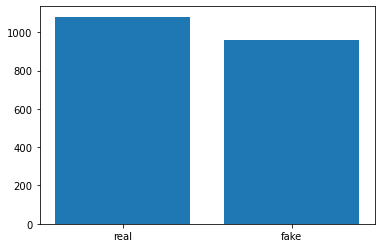

In [8]:
unique,count = np.unique(target,return_counts=True)
plt.bar(CATEGORIES,count)

In [9]:
# Split data into training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(flat_data,target,test_size=0.3,random_state=0)

In [10]:
len(x_test)

613

In [11]:
len(y_test)

613

# RandomForestClassifier

In [12]:
from sklearn.ensemble import RandomForestClassifier
#gpc = RandomForestClassifier(n_estimators =100).fit(x_train,y_train)
model=RandomForestClassifier(max_depth=2500)
model.fit(x_train,y_train)
pred=model.predict(x_test)

from sklearn.metrics import confusion_matrix,accuracy_score
print(accuracy_score(y_test,pred))
cm=confusion_matrix(y_test,pred)
cm




0.6084828711256117


array([[232, 101],
       [139, 141]], dtype=int64)

Text(24.0, 0.5, 'Original Values')

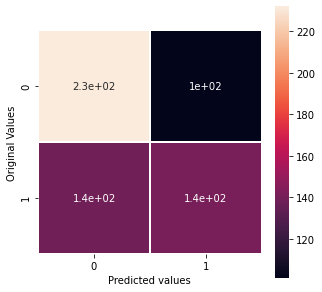

In [13]:
import seaborn as sns
plt.figure(figsize=(5,5))
sns.heatmap(cm,annot=True, linewidth=.5, square = True)
plt.xlabel('Predicted values')
plt.ylabel('Original Values')

# KNeighborsClassifier

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test  = scaler.transform(x_test)



In [15]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(x_train,y_train)

KNeighborsClassifier()

In [16]:
y_pred = classifier.predict(x_test)

In [17]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,y_pred))
cm=confusion_matrix(y_test,y_pred)
cm
                    
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.59      0.56      0.58       333
           1       0.51      0.54      0.53       280

    accuracy                           0.55       613
   macro avg       0.55      0.55      0.55       613
weighted avg       0.56      0.55      0.55       613

0.5530179445350734


Text(24.0, 0.5, 'Original Values')

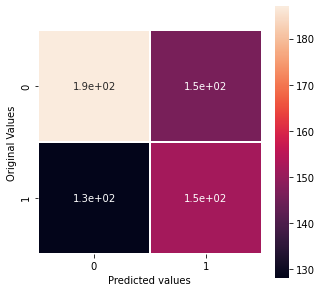

In [18]:
import seaborn as sns
plt.figure(figsize=(5,5))
sns.heatmap(cm,annot=True, linewidth=.5, square = True)
plt.xlabel('Predicted values')
plt.ylabel('Original Values')

# NaiveBayes

In [19]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train,y_train)
model.score(x_test,y_test)


0.5415986949429038

In [20]:
y1_pred = model.predict(x_test)
y1_pred 

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,

In [21]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[187 146]
 [128 152]]


0.5530179445350734

In [22]:
model.score(x_test,y_test)

0.5415986949429038

Text(24.0, 0.5, 'Original Values')

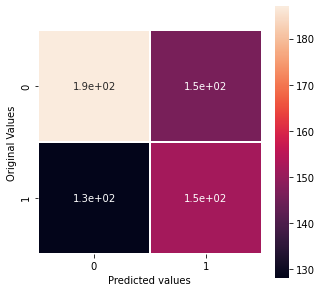

In [23]:
import seaborn as sns
plt.figure(figsize=(5,5))
sns.heatmap(cm,annot=True, linewidth=.5, square = True)
plt.xlabel('Predicted values')
plt.ylabel('Original Values')

# Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression()  
classifier.fit(x_train, y_train)  


C:\Users\adars\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
Y_pred=classifier.predict(x_test)
Y_pred

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,

In [26]:
cm=confusion_matrix(y_test, Y_pred)
cm


array([[177, 156],
       [134, 146]], dtype=int64)

In [27]:
accuracy_score(y_test, Y_pred)

0.5269168026101142

Text(24.0, 0.5, 'Original Values')

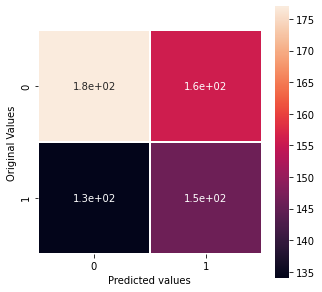

In [28]:
import seaborn as sns
plt.figure(figsize=(5,5))
sns.heatmap(cm,annot=True, linewidth=.5, square = True)
plt.xlabel('Predicted values')
plt.ylabel('Original Values')

# DecisionTreeClassifier  

In [29]:
from sklearn.tree import DecisionTreeClassifier  
classifier_dt= DecisionTreeClassifier(random_state=0) 
classifier_dt.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [30]:
y_pred_dt= classifier_dt.predict(x_test)
y_pred_dt

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,

In [31]:
cm= confusion_matrix(y_test, y_pred_dt)
cm

array([[194, 139],
       [154, 126]], dtype=int64)

In [32]:
accuracy_score(y_test,y_pred_dt)

0.5220228384991843

Text(24.0, 0.5, 'Original Values')

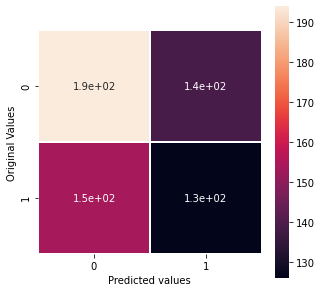

In [33]:
import seaborn as sns
plt.figure(figsize=(5,5))
sns.heatmap(cm,annot=True, linewidth=.5, square = True)
plt.xlabel('Predicted values')
plt.ylabel('Original Values')

# Support Vector Machine

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
              {'C':[1,10,100,1000],'kernel':['linear']},
              {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']}
             ]
# Suppport vector
svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

In [ ]:
y_pred = clf.predict(x_test)
y_pred

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_pred,y_test)
cm=confusion_matrix(y_pred,y_test)

In [ ]:
import seaborn as sns
plt.figure(figsize=(5,5))
sns.heatmap(cm,annot=True, linewidth=.5, square = True)
plt.xlabel('Predicted values')
plt.ylabel('Original Values')

# Graph

No handles with labels found to put in legend.


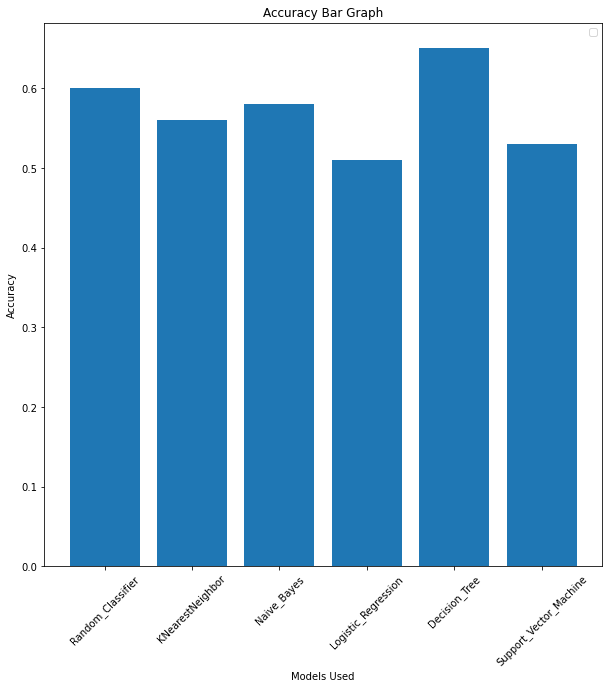

In [1]:
from ast import increment_lineno
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
Regressions=['Random_Classifier','KNearestNeighbor','Naive_Bayes','Logistic_Regression','Decision_Tree','Support_Vector_Machine']
Accuracy=[0.60,0.56,0.58,0.51,0.65,0.53]
xpos= np.arange(len(Regressions))
fig=plt.figure(figsize=(10,10))
plt.bar(Regressions, Accuracy)
plt.xticks(rotation=45)
plt.xlabel("Models Used")
plt.ylabel("Accuracy")
plt.title('Accuracy Bar Graph')
plt.legend()